# Ways to visualize top count with Pandas and matplotlib

Given different categories of items, we will explore how to achieve the following with Pandas and matplotlib:
- Visualize top 10 apps with the highest rating in table
- Visualize top 10 categories with most number of apps rated 5 in Pie chart
- Visualize top 10 apps for each category in subplots

See [atoti.ipynb](atoti.ipynb) to see how we can achieve the similar top count visualization with atoti.

__Note on data:__
We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover.png" alt="atoti" /></a></div>

## Top count with Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_playstore = pd.read_csv("https://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv")
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Weather forecast,WEATHER,4.8,159455,10000000.0,1000000,Free,0.00,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up
1,Weather Live Pro,WEATHER,4.8,17493,11000000.0,100000,Paid,4.49,Everyone,Weather,"April 20, 2018",1.3,4.4 and up
2,Live Weather Pro,WEATHER,4.8,892,17000000.0,10000,Free,0.00,Everyone,Weather,"July 17, 2018",1.1,4.4 and up
3,Fu*** Weather (Funny Weather),WEATHER,4.7,20001,NaN,1000000,Free,0.00,Mature 17,Weather,"July 26, 2018",Varies with device,Varies with device
4,Weather Forecast Pro,WEATHER,4.7,14051,8700000.0,100000,Paid,3.99,Everyone,Weather,"August 4, 2018",8.5,4.0 and up


### Top 10 apps with highest rating across categories  

We can use Pandas [`nlargest`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function to get the top count, sorted first by Ratings and followed by Reviews.

In [3]:
df_playstore.nlargest(10, ["Rating"])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
243,CJ's Coffee Cafe,TRAVEL_AND_LOCAL,5.0,6,2400000.0,500,Free,0.0,Everyone,Travel & Local,"August 21, 2017",7.5.0,4.0.3 and up
244,BG Guide,TRAVEL_AND_LOCAL,5.0,3,2400000.0,100,Free,0.0,Everyone,Travel & Local,"November 28, 2016",1.1,2.3.3 and up
245,Florida Beach Wallpapers HD,TRAVEL_AND_LOCAL,5.0,3,12000000.0,100,Free,0.0,Everyone,Travel & Local,"December 30, 2015",1.8.1,4.1 and up
462,CL REPL,TOOLS,5.0,47,17000000.0,1000,Free,0.0,Everyone,Tools,"April 10, 2018",1.0.19,4.1 and up
463,CL Notifier,TOOLS,5.0,36,3200000.0,100,Free,0.0,Teen,Tools,"August 2, 2017",1,4.0 and up
464,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,3200000.0,5000,Free,0.0,Everyone,Tools,"June 13, 2018",1.1.3,4.3 and up
465,Dr. ES PV Calculator,TOOLS,5.0,19,11000000.0,500,Free,0.0,Everyone,Tools,"March 11, 2018",3.4.7.2.16,4.1 and up
466,DW Timer,TOOLS,5.0,9,1500000.0,100,Free,0.0,Everyone,Tools,"April 5, 2017",1,1.6 and up
467,BK Formula Calculator,TOOLS,5.0,6,11000000.0,100,Free,0.0,Everyone,Tools,"August 8, 2015",0.1.1,4.2 and up
468,CR Tracker for Chests,TOOLS,5.0,6,4500000.0,50,Free,0.0,Everyone,Tools,"June 5, 2018",1.0.2,4.1 and up


### Top 10 categories with the most number of apps rated 5

The following snippet group the apps that are rated 5 by category in order to obtain the count.

In [4]:
cat_app_rated_5 = (
    df_playstore[df_playstore["Rating"] == 5].groupby(["Category"])["App"].count()
)
cat_app_rated_5

Category
ART_AND_DESIGN          1
BOOKS_AND_REFERENCE     6
BUSINESS               18
COMICS                  2
COMMUNICATION           5
DATING                  6
EVENTS                  6
FAMILY                 67
FINANCE                 8
FOOD_AND_DRINK          2
GAME                   12
HEALTH_AND_FITNESS     12
LIBRARIES_AND_DEMO      2
LIFESTYLE              29
MEDICAL                25
NEWS_AND_MAGAZINES      7
PARENTING               1
PERSONALIZATION        10
PHOTOGRAPHY             6
PRODUCTIVITY            8
SHOPPING                6
SOCIAL                  8
SPORTS                  4
TOOLS                  17
TRAVEL_AND_LOCAL        3
Name: App, dtype: int64

[pandas.DataFrame.plot.pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html) is a wrapper over wraps “matplotlib.pyplot.pie()”. We use it to plot a pie chart directly from the dataframe.  

Note that in order to display the value of each slice in the pie, we needed another function to compute the value. Otherwise, if the percentage composition is sufficient, we can just set `autopct='%1.1f%%'`

In [5]:
def func(pct, allvals):
    return int(pct/100.*np.sum(allvals))

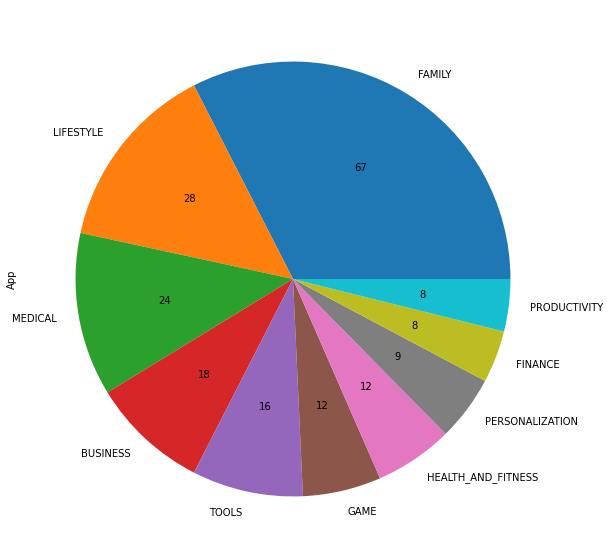

In [6]:
plot = cat_app_rated_5.nlargest(10).plot.pie(figsize=(13, 10), autopct=lambda pct: func(pct, cat_app_rated_5.nlargest(10)))

### Top 10 apps within each category

By sorting in descending order, we get the top count. Likewise, by sorting in ascending order, we get the bottom count.  
By using `head(n)`, we can get the first n records that is sorted. 

In [7]:
df_playstore.sort_values(
    ["Category", "Rating"], ascending=False, inplace=True
)
top10_by_cat = df_playstore.groupby("Category").head(10)
top10_by_cat.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Weather forecast,WEATHER,4.8,159455,10000000.0,1000000,Free,0.00,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up
1,Weather Live Pro,WEATHER,4.8,17493,11000000.0,100000,Paid,4.49,Everyone,Weather,"April 20, 2018",1.3,4.4 and up
2,Live Weather Pro,WEATHER,4.8,892,17000000.0,10000,Free,0.00,Everyone,Weather,"July 17, 2018",1.1,4.4 and up
3,Fu*** Weather (Funny Weather),WEATHER,4.7,20001,NaN,1000000,Free,0.00,Mature 17,Weather,"July 26, 2018",Varies with device,Varies with device
4,Weather Forecast Pro,WEATHER,4.7,14051,8700000.0,100000,Paid,3.99,Everyone,Weather,"August 4, 2018",8.5,4.0 and up
5,weather - weather forecast,WEATHER,4.7,11118,9700000.0,1000000,Free,0.00,Everyone,Weather,"April 26, 2018",30,4.0 and up
6,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868,NaN,1000000,Free,0.00,Everyone,Weather,"June 12, 2018",Varies with device,Varies with device
7,Klara weather,WEATHER,4.6,36900,4800000.0,500000,Free,0.00,Everyone,Weather,"July 28, 2018",1.3.6,4.0 and up
8,WebCams,WEATHER,4.6,3963,23000000.0,100000,Free,0.00,Everyone,Weather,"July 17, 2018",5.2.11,4.2 and up
9,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.5,1422858,NaN,50000000,Free,0.00,Everyone,Weather,"August 3, 2018",Varies with device,Varies with device


We shall render the pie charts for a few selected categories for demonstration purpose.

In [8]:
data = top10_by_cat.loc[
    top10_by_cat["Category"].isin(
        ["BUSINESS", "FAMILY", "LIFESTYLE", "MEDICAL", "TOOLS", "GAME"]
    )
][["Category", "App", "Reviews"]].copy()
data.head()

,Category,App,Reviews
462,TOOLS,CL REPL,47
463,TOOLS,CL Notifier,36
464,TOOLS,CL Keyboard - Myanmar Keyboard (No Ads),24
465,TOOLS,Dr. ES PV Calculator,19
466,TOOLS,DW Timer,9


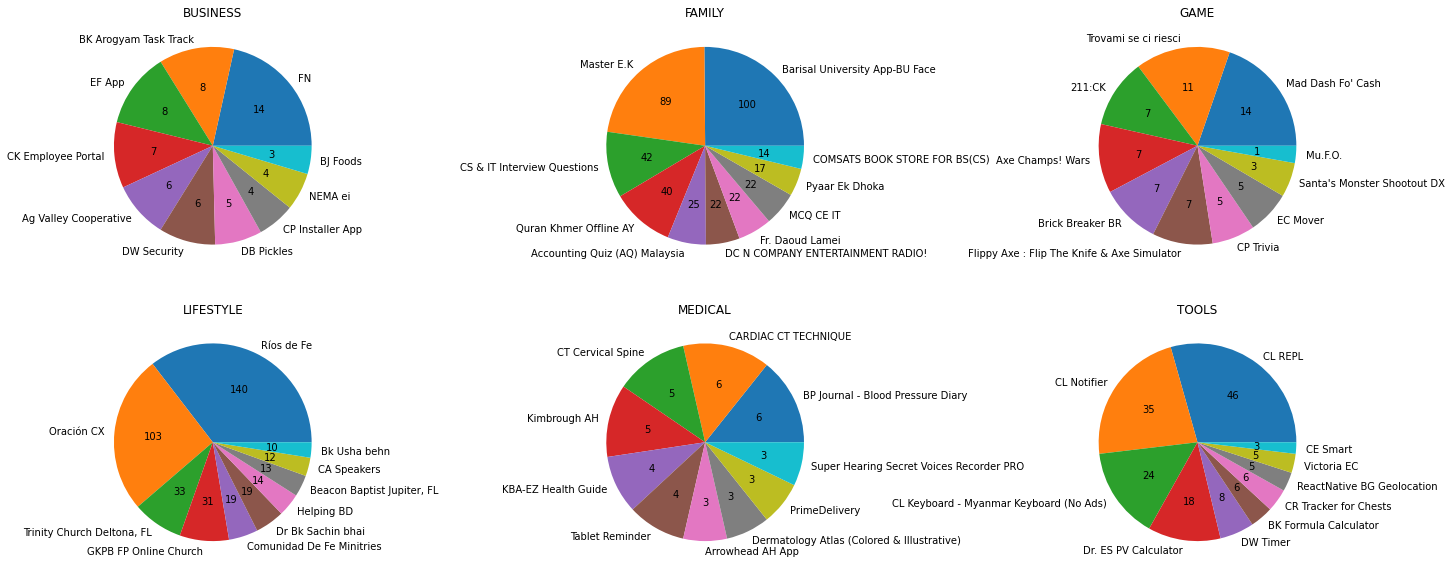

In [9]:
import matplotlib.pyplot as plt

cols = 3
gCat = data.groupby("Category")
rows = int(np.ceil(len(gCat) / cols))
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(25, 10))

for (cat, grp), ax in zip(gCat, axes.flat):
    ax.pie(grp.Reviews, labels=grp.App, autopct=lambda pct: func(pct, grp.Reviews))
    ax.set_title(cat)

if len(gCat) < cols * rows:
    for ax in axes.flatten()[len(gCat) :]:
        ax.axis("off")

plt.show()

  
<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover-try.png" alt="atoti" /></a></div>